![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
'''
filename_features = "../Dados/UCI HAR Dataset/features.txt"
filename_labels = "../Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "../Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "../Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "../Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "../Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "../Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "../Dados/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])
'''

'\nfilename_features = "../Dados/UCI HAR Dataset/features.txt"\nfilename_labels = "../Dados/UCI HAR Dataset/activity_labels.txt"\n\nfilename_subtrain = "../Dados/UCI HAR Dataset/train/subject_train.txt"\nfilename_xtrain = "../Dados/UCI HAR Dataset/train/X_train.txt"\nfilename_ytrain = "../Dados/UCI HAR Dataset/train/y_train.txt"\n\nfilename_subtest = "../Dados/UCI HAR Dataset/test/subject_test.txt"\nffilename_xtest = "../Dados/UCI HAR Dataset/test/X_test.txt"\nfilename_ytest = "../Dados/UCI HAR Dataset/test/y_test.txt"\n\nfeatures = pd.read_csv(filename_features, header=None, names=[\'nome_var\'], squeeze=True, sep="#")\nlabels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=[\'cod_label\', \'label\'])\n\nsubject_train = pd.read_csv(filename_subtrain, header=None, names=[\'subject_id\'], squeeze=True)\nX_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())\ny_train = pd.read_csv(filename_ytrain, header=None, names=[\

In [3]:
# Importando dados de treino e test
link = "./../17_modulo/data/"

X_train = load(link+"X_train_df")
y_train = pd.DataFrame(load(link+"y_train_df"))
X_test = load(link+"X_test_df")
y_test = pd.DataFrame(load(link+"y_test_df"))

print(f"X_train:  {X_train.shape}")
print(f"y_train:  {y_train.shape}")
print(f"X_test:   {X_test.shape}")
print(f"y_test:   {y_test.shape}")

X_train:  (7352, 561)
y_train:  (7352, 1)
X_test:   (2210, 561)
y_test:   (2210, 1)


In [4]:
# Separando os bancos de treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5514, 561)
(1838, 561)
(5514, 1)
(1838, 1)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

### Dados originais

In [5]:
# Instânciando dataset de componentes após PCA
pca = PCA()

X_train_princomp = pca.fit(X_train)
X_train_princomp.explained_variance_ratio_.cumsum()

array([0.23821635, 0.33776615, 0.39768265, 0.43661743, 0.46856036,
       0.48820838, 0.50416261, 0.51897967, 0.53208303, 0.54449905,
       0.55524501, 0.5655021 , 0.57528687, 0.58324937, 0.59018415,
       0.59659536, 0.60269583, 0.60865214, 0.61418637, 0.61953634,
       0.62485965, 0.62991211, 0.63493867, 0.63978653, 0.64444875,
       0.64885452, 0.65324516, 0.6575607 , 0.66160695, 0.66557357,
       0.66937305, 0.67310995, 0.67679419, 0.68023703, 0.68363206,
       0.68697401, 0.69025613, 0.69350345, 0.69665687, 0.69977171,
       0.70283031, 0.70585835, 0.7088088 , 0.71165965, 0.71447435,
       0.71720026, 0.71987926, 0.72251162, 0.72504148, 0.72752328,
       0.72998303, 0.7324173 , 0.73479027, 0.73710965, 0.73941893,
       0.74167627, 0.74389376, 0.74609162, 0.74825622, 0.75038458,
       0.75245555, 0.75448529, 0.75649115, 0.75847986, 0.76042292,
       0.76234112, 0.76423884, 0.76610947, 0.76793778, 0.76974718,
       0.77154159, 0.77327698, 0.77499915, 0.77671389, 0.77841

### Critério 1 - autovalor > 1

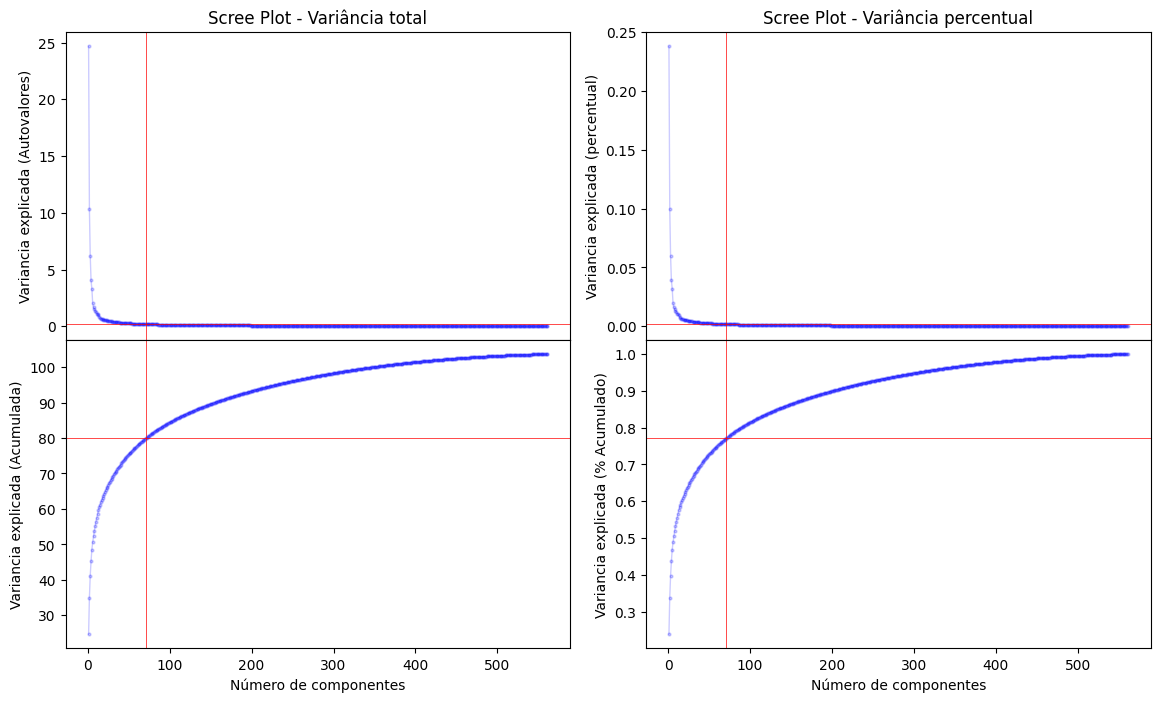

In [6]:
princomp = X_train_princomp

# Critério 1: autovalor padronizado > 1
ncomp_criterio1 = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd_componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

# Gráfico da variância percentual por qtd_componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

# Gráfico da variância percentual acumulada por qtd_componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)


# linhas horizontais
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [7]:
print(f"Número de variáveis, usando o critério 1: {ncomp_criterio1}")

Número de variáveis, usando o critério 1: 71


### Critério 2 - *screeplot* ou critério do cotovelo

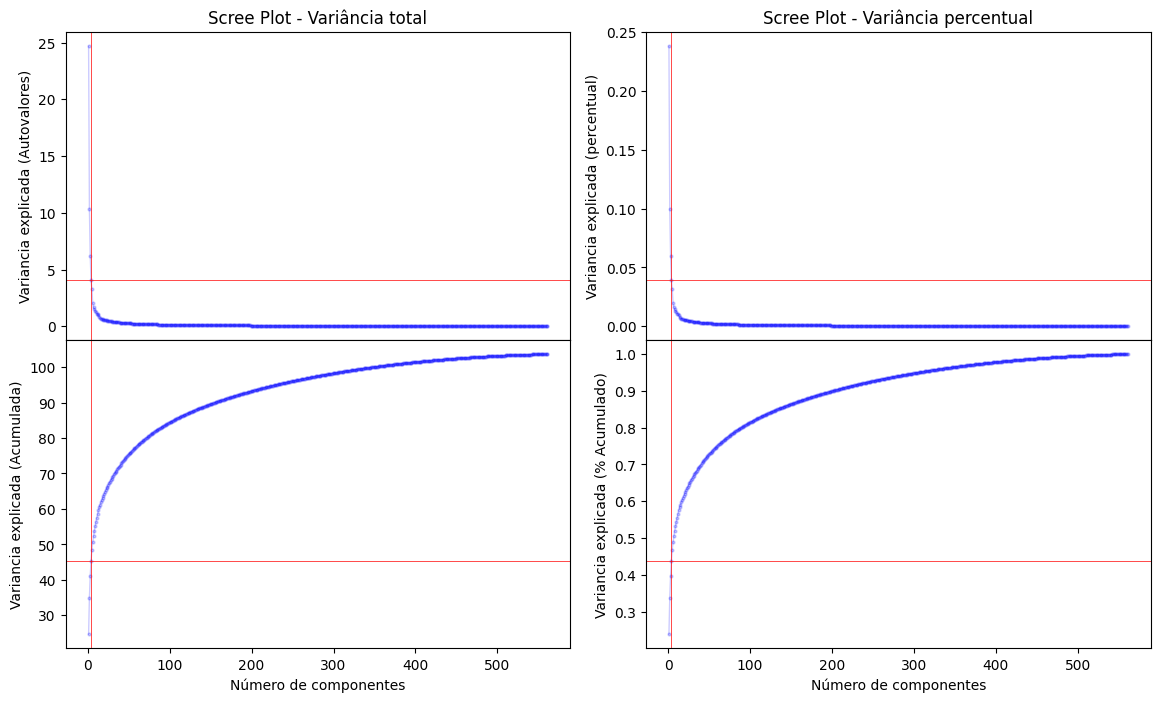

In [8]:
# Critério 2: Método do "cotovelo"
ncomp_criterio2 = 4

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Número de componentes pelo critério 2
ax[0,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [9]:
print(f"Número de variáveis, usando o critério 2: {ncomp_criterio2}")

Número de variáveis, usando o critério 2: 4


### Critéiro 3: Variância explicada > x

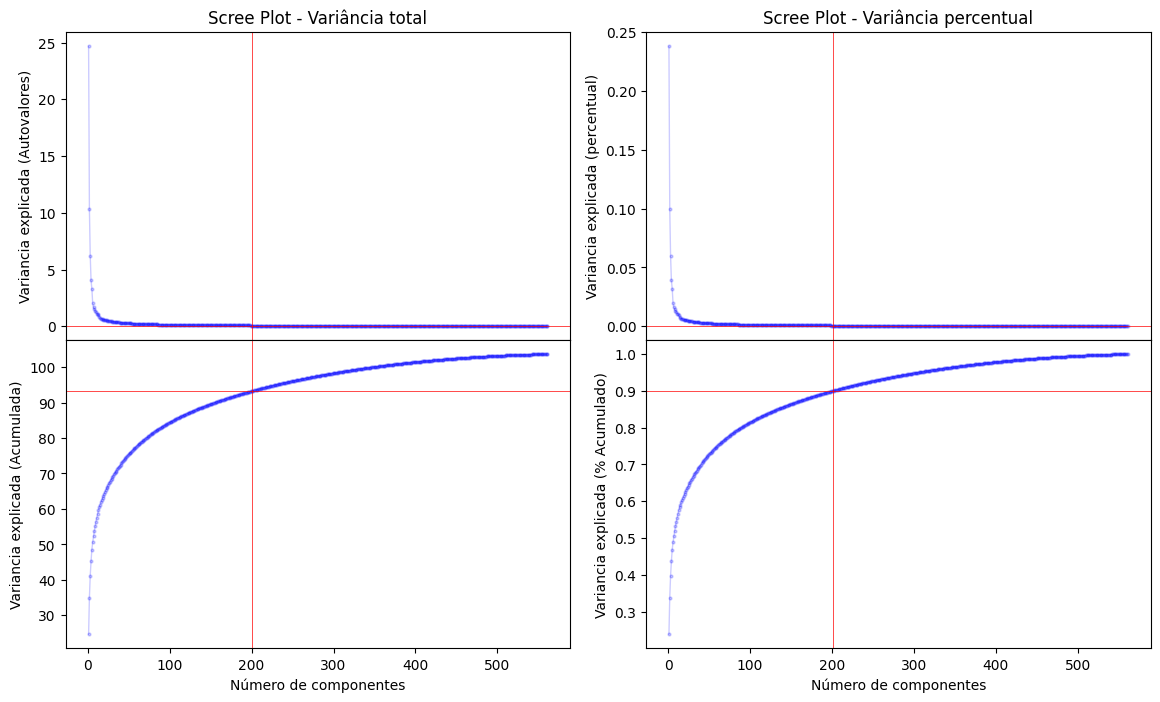

In [10]:
# Critério 3: % variância explicada

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

# Número de componentes pelo critério 3
varexplicada = .9
ncomp_criterio3 = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [11]:
print(f"Número de variáveis, usando o critério 3: {ncomp_criterio3}")

Número de variáveis, usando o critério 3: 201


### Dados Normalizados

In [12]:
%%time
# Obtendo o dataset de variáveis independentes normalizadas
def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_train_pad.shape

CPU times: total: 797 ms
Wall time: 784 ms


(5514, 561)

In [13]:
# Instânciando dataset de componentes após PCA
pca = PCA()

X_train_pad_princomp = pca.fit(X_train_pad)
X_train_pad_princomp.explained_variance_ratio_.cumsum()

array([0.24276927, 0.31990291, 0.37028051, 0.40433737, 0.43413209,
       0.4526397 , 0.46770671, 0.48005263, 0.49148938, 0.50243581,
       0.51322527, 0.52314788, 0.53151176, 0.53885542, 0.54550276,
       0.55168252, 0.55750215, 0.56293017, 0.56805826, 0.57284284,
       0.57755811, 0.58217889, 0.58656396, 0.59087462, 0.59513449,
       0.59928357, 0.60330197, 0.60716756, 0.61089439, 0.61457408,
       0.61819099, 0.62170157, 0.62506981, 0.62835585, 0.63152321,
       0.63458946, 0.63764642, 0.6405841 , 0.64345856, 0.6463081 ,
       0.64913621, 0.65194793, 0.65470615, 0.65739512, 0.66003764,
       0.66265882, 0.66525923, 0.66783715, 0.67040188, 0.67292984,
       0.67542322, 0.67789841, 0.68036037, 0.68277768, 0.68516644,
       0.68754612, 0.68989299, 0.69222097, 0.69452715, 0.69680817,
       0.69905988, 0.70130194, 0.70352993, 0.70571463, 0.70787577,
       0.7100051 , 0.71211503, 0.71419242, 0.71625883, 0.71831122,
       0.72034509, 0.72236901, 0.72438124, 0.7263848 , 0.72837

### Critério 1 - autovalor > 1

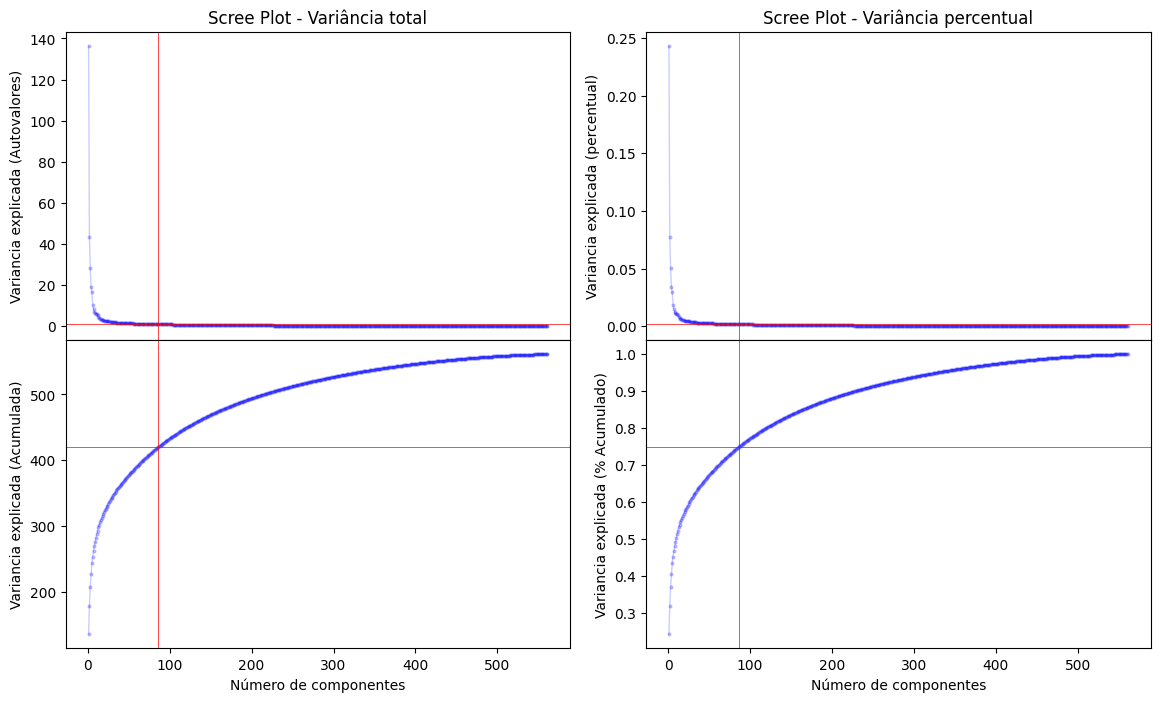

In [14]:
princomp = X_train_pad_princomp

# Critério 1: autovalor padronizado > 1
ncomp_criterio1 = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd_componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

# Gráfico da variância percentual por qtd_componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

# Gráfico da variância percentual acumulada por qtd_componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio1, color = 'r', linestyle = '-', linewidth=.5)


# linhas horizontais
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio1-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [15]:
print(f"Número de variáveis, usando o critério 1: {ncomp_criterio1}")

Número de variáveis, usando o critério 1: 86


### Critério 2 - *screeplot* ou critério do cotovelo

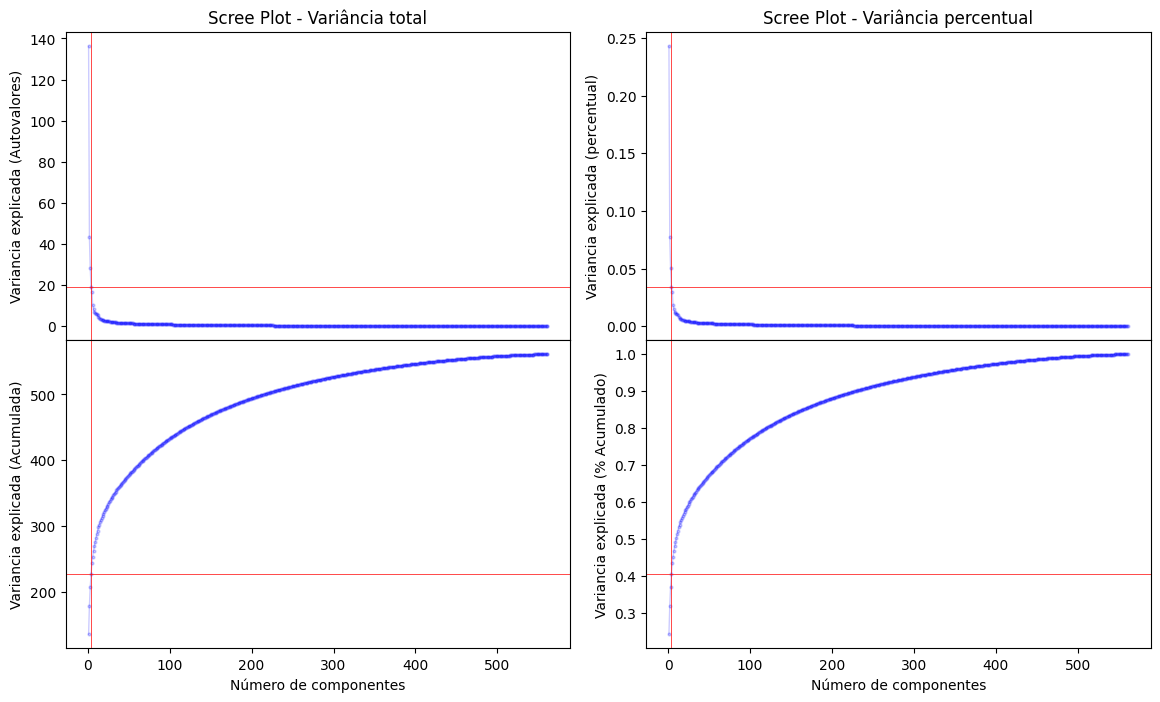

In [16]:
# Critério 2: Método do "cotovelo"
ncomp_criterio2 = 4

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Número de componentes pelo critério 2
ax[0,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio2, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio2-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [17]:
print(f"Número de variáveis, usando o critério 2: {ncomp_criterio2}")

Número de variáveis, usando o critério 2: 4


### Critéiro 3: Variância explicada > x

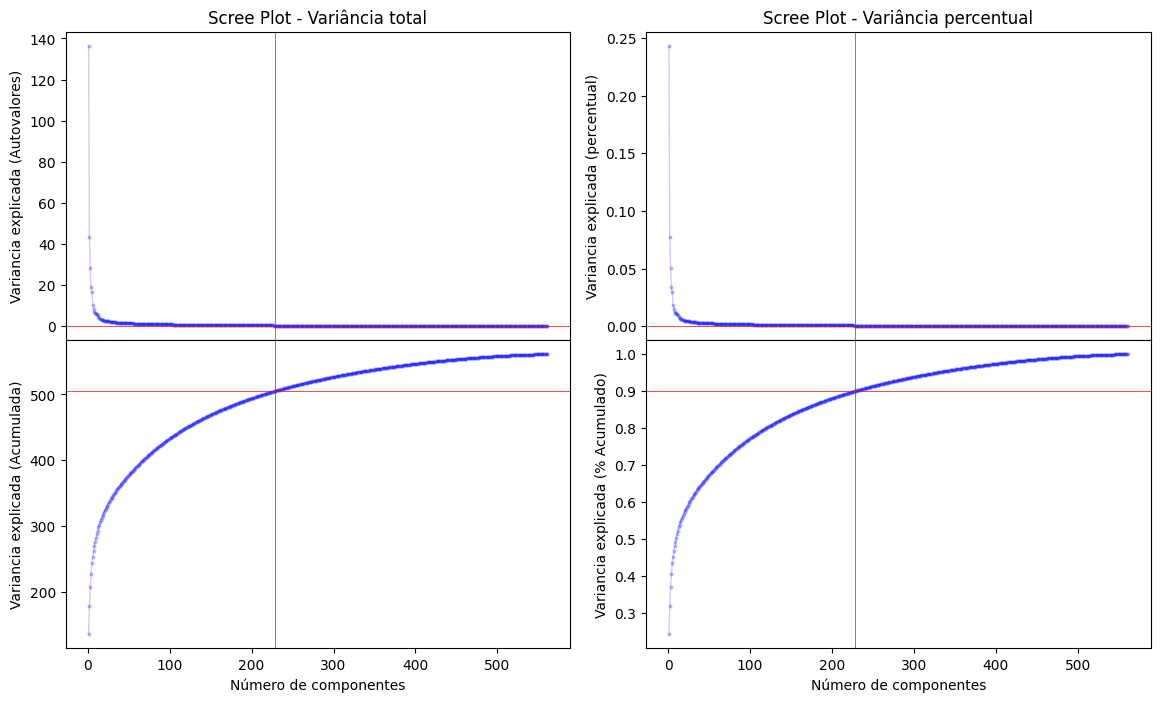

In [18]:
# Critério 3: % variância explicada

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

# Número de componentes pelo critério 3
varexplicada = .9
ncomp_criterio3 = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
ax[0,0].axhline(y = princomp.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = princomp.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = princomp.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = princomp.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [19]:
print(f"Número de variáveis, usando o critério 3: {ncomp_criterio3}")

Número de variáveis, usando o critério 3: 228


#### Conclusão

- Usando o critério 3, Variância explicada > 90%, temos o número de componentes que explica 90% da variância total.
  - Utilizando os dados originais teremos que utilizar 200 variáveis.
  - Utilizando os dados padronizados teremos que utilizar 227 variáveis.

---

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [20]:
X_test_princomp = pca.fit(X_test)
X_test_pad_princomp = pca.fit(X_test_pad)

X_train_pca = X_train_princomp.transform(X_train)[:,:10]
X_test_pca = X_test_princomp.transform(X_test)[:,:10]
X_train_pad_pca = X_train_pad_princomp.transform(X_train_pad)[:,:10]
X_test_pad_pca = X_test_pad_princomp.transform(X_test_pad)[:,:10]

In [21]:
X_train_pca.shape

(5514, 10)

In [22]:
%time
#  Instânciando Árvore de Descisão com ccp alpha 0.001
ccp_alpha = 0.001
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_pca, y_train)
clf

CPU times: total: 0 ns
Wall time: 0 ns


DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

A acurácia na base de train é: 0.6565107000362713
A acurácia na base de testes é: 0.21447963800904976


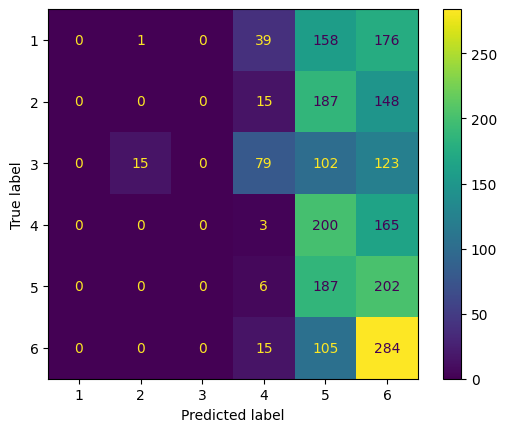

In [23]:
y_pred = clf.predict(X_train_pca)
print(f'A acurácia na base de train é: {accuracy_score(y_pred, y_train)}')
y_pred = clf.predict(X_test_pca)
print(f'A acurácia na base de testes é: {accuracy_score(y_pred, y_test)}')

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_).plot()
plt.show()

In [24]:
%%time

#  Instânciando Árvore de Descisão com ccp alpha 0.001
clf_pad = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_pad_pca, y_train)
clf_pad

CPU times: total: 109 ms
Wall time: 147 ms


DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

A acurácia na base de train é: 0.401886108088502
A acurácia na base de testes é: 0.4004524886877828


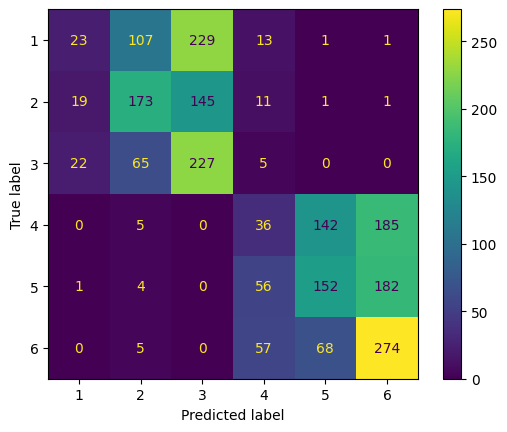

In [25]:
y_pred = clf.predict(X_train_pad_pca)
print(f'A acurácia na base de train é: {accuracy_score(y_pred, y_train)}')
y_pred = clf.predict(X_test_pad_pca)
print(f'A acurácia na base de testes é: {accuracy_score(y_pred, y_test)}')

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_).plot()
plt.show()

### Conclusão:

- A base padronizada teve acurácia igual na base de treino e na de teste;
- Já a não padronizada, apresentou overfitting;